In [2]:
!pip install mlxtend

In [9]:
!pip install WordCloud

In [10]:
import pandas as pd
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
import numpy as np
import csv
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt

from wordcloud import WordCloud

In [4]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

        ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

        ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

        ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

      ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [6]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


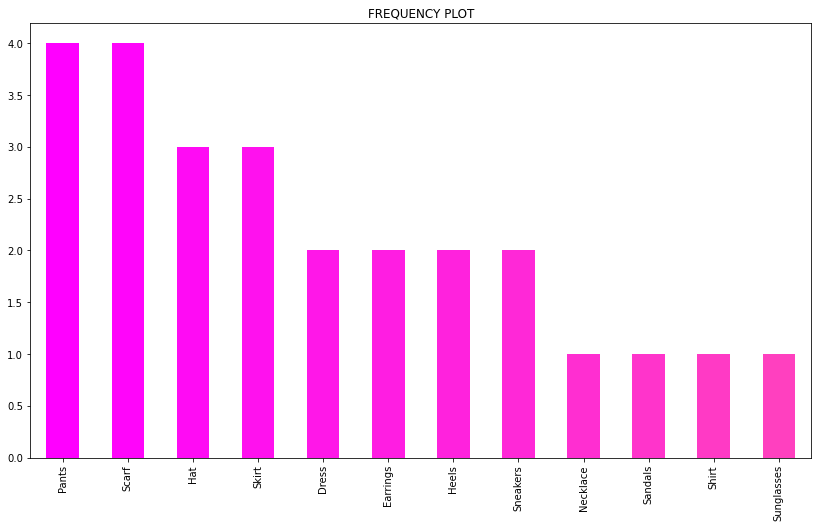

In [14]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
df.sum().sort_values(ascending=False).head(cnt).plot.bar(color = color)
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

In [28]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Scarf, Pants)"
5,0.6,"(Skirt, Pants)"


In [31]:
type(frequent_itemsets)
print(frequent_itemsets.dtypes)

support     float64
itemsets     object
dtype: object


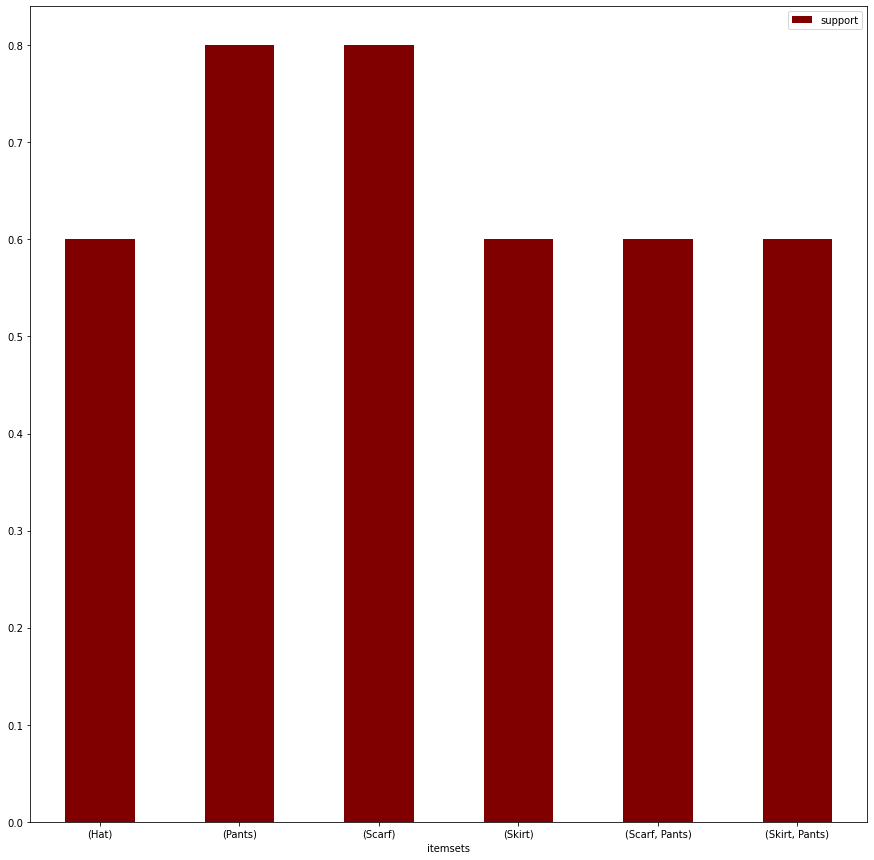

In [36]:
ax = frequent_itemsets.plot.bar(x='itemsets', y='support', rot=0, color ='maroon')

In [38]:
data= pd.read_csv("Market_Basket_Optimisation.csv", delimiter= ",", header= None)

data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [41]:
df_res = pd.DataFrame()
for i in range(len(data.columns)):
    df_res = df_res.append(data[i].value_counts()) 
df_res.head(5)

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,cauliflower,ketchup,cream,body spray,oatmeal,tea,water spray,zucchini,napkins,asparagus
0,577.0,576.0,458.0,391.0,373.0,354.0,325.0,293.0,279.0,270.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1,484.0,78.0,11.0,223.0,234.0,411.0,153.0,78.0,302.0,101.0,...,1.0,5.0,1.0,13.0,4.0,5.0,1.0,10.0,NaN,NaN
2,375.0,NaN,NaN,174.0,87.0,279.0,48.0,21.0,225.0,50.0,...,1.0,2.0,1.0,14.0,5.0,4.0,1.0,2.0,NaN,NaN
3,201.0,NaN,NaN,143.0,18.0,167.0,9.0,1.0,181.0,55.0,...,3.0,6.0,1.0,9.0,6.0,1.0,1.0,9.0,1.0,NaN
4,84.0,NaN,NaN,115.0,2.0,62.0,NaN,NaN,134.0,45.0,...,4.0,3.0,1.0,15.0,2.0,4.0,NaN,17.0,2.0,NaN


In [44]:
results = []
with open("Market_Basket_Optimisation.csv") as csvfile:
    reader = csv.reader(csvfile) 
    for row in reader: # each row is a list
        results.append(row)
te=TransactionEncoder()
te_ary=te.fit(results).transform(results)
data=pd.DataFrame(te_ary,columns=te.columns_)
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


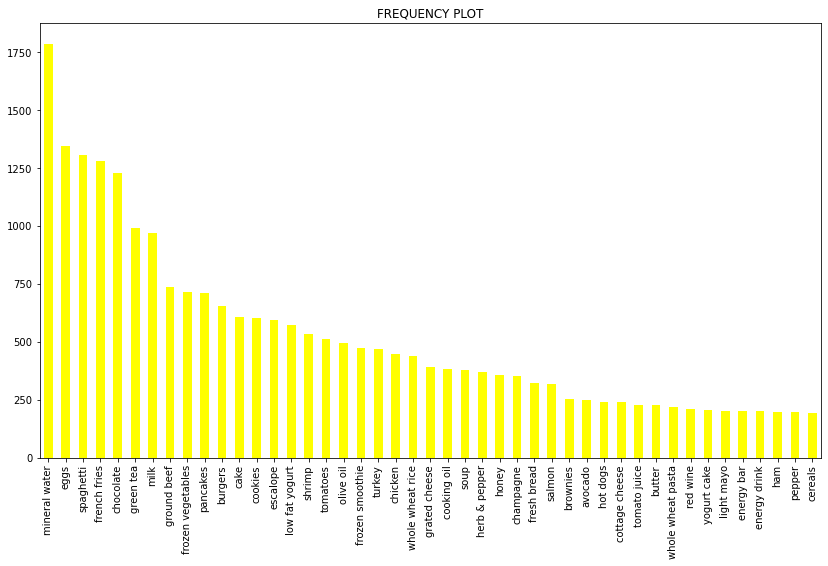

In [47]:
plt.figure(figsize=(14,8))
plt.title("FREQUENCY PLOT")
cnt = 45 # plot only first 'cnt' values
color = plt.cm.spring(np.linspace(0, 1, cnt))
data.sum().sort_values(ascending=False).head(cnt).plot.bar(color = 'yellow')
plt.xticks(rotation = 'vertical')
plt.grid(False)
plt.axis('on')
plt.show()

In [49]:

freq_rules = apriori(data, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(milk, mineral water, ground beef)"
253,0.017064,"(mineral water, spaghetti, ground beef)"
254,0.015731,"(milk, mineral water, spaghetti)"
255,0.010265,"(mineral water, spaghetti, olive oil)"


In [50]:
rules = association_rules(freq_rules, metric="lift", min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
159,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
158,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
324,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
329,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
341,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898,1,2
...,...,...,...,...,...,...,...,...,...,...,...
101,(low fat yogurt),(eggs),0.076523,0.179709,0.016798,0.219512,1.221484,0.003046,1.050997,1,1
152,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
153,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
109,(escalope),(french fries),0.079323,0.170911,0.016398,0.206723,1.209537,0.002841,1.045145,1,1
